In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Making a Quick CNN for Cifar-10 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
import keras

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Dropout,Dense,BatchNormalization
from keras.optimizers import Adam

(<matplotlib.image.AxesImage at 0x7f5fc01c5978>, array([6], dtype=uint8))

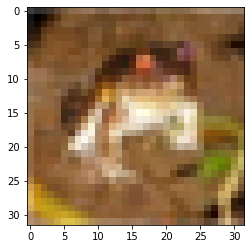

In [15]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()
plt.imshow(X_train[0]),y_train[0]

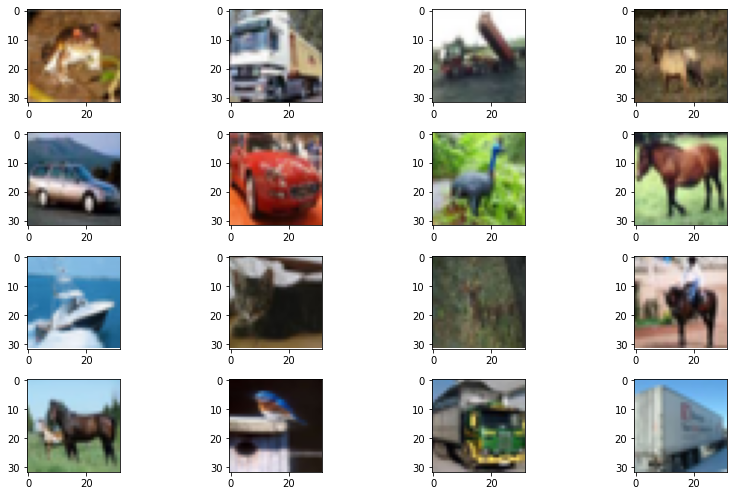

In [16]:
plt.figure(figsize=(12,7))

for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_train[i])
        
plt.tight_layout()

In [17]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [19]:
X_train = X_train/255.
X_test=X_test/255.

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
model = Sequential()
model.add(Conv2D(filters = 512, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


model.add(Conv2D(filters = 64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 512)       14336     
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 512)       2048      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 512)       2359808   
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 512)       2048      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 512)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        294976    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)         

In [22]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adagrad(lr=0.021),metrics=['accuracy'],)

In [23]:
history=model.fit(X_train,y_train,validation_split=0.2 ,batch_size=32,epochs=25,shuffle=True,)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 63s 2ms/step - loss: 1.8884 - accuracy: 0.3907 - val_loss: 1.3664 - val_accuracy: 0.5000
Epoch 2/25
40000/40000 [==============================] - 61s 2ms/step - loss: 1.2531 - accuracy: 0.5493 - val_loss: 1.1706 - val_accuracy: 0.5740
Epoch 3/25
40000/40000 [==============================] - 61s 2ms/step - loss: 1.0182 - accuracy: 0.6365 - val_loss: 0.9086 - val_accuracy: 0.6807
Epoch 4/25
40000/40000 [==============================] - 62s 2ms/step - loss: 0.8694 - accuracy: 0.6926 - val_loss: 0.8083 - val_accuracy: 0.7141
Epoch 5/25
40000/40000 [==============================] - 61s 2ms/step - loss: 0.7604 - accuracy: 0.7304 - val_loss: 0.7450 - val_accuracy: 0.7372
Epoch 6/25
40000/40000 [==============================] - 61s 2ms/step - loss: 0.6740 - accuracy: 0.7625 - val_loss: 0.6838 - val_accuracy: 0.7580
Epoch 7/25
40000/40000 [==============================] - 61s 2ms/st

In [24]:
evaluation=model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 5s 489us/step
Test Accuracy: 0.8030999898910522


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


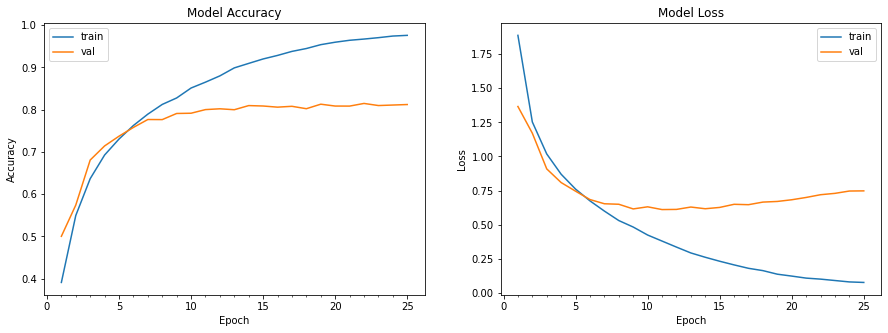

In [25]:
def plotmodelhistory(modelhistory, acc='accuracy', valacc='val_accuracy'): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    
    axs[0].plot(range(1,len(modelhistory.history[acc])+1),modelhistory.history[acc]) 
    axs[0].plot(range(1,len(modelhistory.history[valacc])+1),modelhistory.history[valacc]) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(modelhistory.history[acc])+1),len(modelhistory.history[acc])/10) 
    axs[0].legend(['train', 'val'], loc='best') 
    
    
    axs[1].plot(range(1,len(modelhistory.history['loss'])+1),modelhistory.history['loss']) 
    axs[1].plot(range(1,len(modelhistory.history['val_loss'])+1),modelhistory.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(modelhistory.history['loss'])+1),len(modelhistory.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plotmodelhistory(history)